Deep Neural Networks, Representation Learning, and Text Analytics


## <span style="color:#0b486b">Deep Feedforward Neural Network </span>


In [ ]:
# Create necessary subfolders to store immediate files for this assignment.
import os
if not os.path.exists("./models/dnn0"):
    os.makedirs("models/dnn0")

####  <span style="color:red">**Question 1.1**</span>. Load the data into *`numpy array`* format of two variables:
* *`x`*: storing features with dimension `[num_samples, width, height]` (`num_samples`: number of samples, `width`: image width, `height`: image height), and
* *`y`*: storing labels with dimension `num_samples`. 
<div style="text-align: right"><span style="color:red">**[3 points]**</span></div>

Enter the missing codes in the following cell to complete this question.

In [ ]:
# import numpy functions
import numpy as np
import scipy.io as sio
data = sio.matlab.loadmat("notMNIST_small.mat")
x, y = data['images'],data['labels']
x = np.rollaxis(x, axis=2)

In [ ]:
x.shape

(18724, 28, 28)

In [ ]:
y.shape

(18724,)

####  <span style="color:red">**Question 1.2**</span>. Print out the total number of data points, and the *unique* labels in this dataset.
<div style="text-align: right"><span style="color:red">**[3 points]**</span></div> 

In [ ]:
# assign variables for displaying the datapoints and unique labels
datapoints_a = len(x)
datapoints_b = np.unique(y)
print("Datapoints available in Rows {} and Columns {} ", datapoints_a)
print("Unique labels of dataset:", datapoints_b)


Datapoints available in Rows {} and Columns {}  18724
Unique labels of dataset: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [ ]:
#To print total number of unique labels
print("The number of unique labels in Total:", len(datapoints_b))

The number of unique labels in Total: 10


####  <span style="color:red"></span> Display 100  images in the form of `10x10` matrix, each row showing 10 *random* images of a label. You might decide to use the function `display_images` provided at the beginning of this assignment, or you can write your own codes.
<div style="text-align: right"><span style="color:red"></span></div> 

In [ ]:
# import matplotlib function to display images from the dataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display_images(images, shape):
    fig = plt.figure(figsize=shape)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(np.prod(shape)):
        p = fig.add_subplot(shape[0], shape[1], i+1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)                

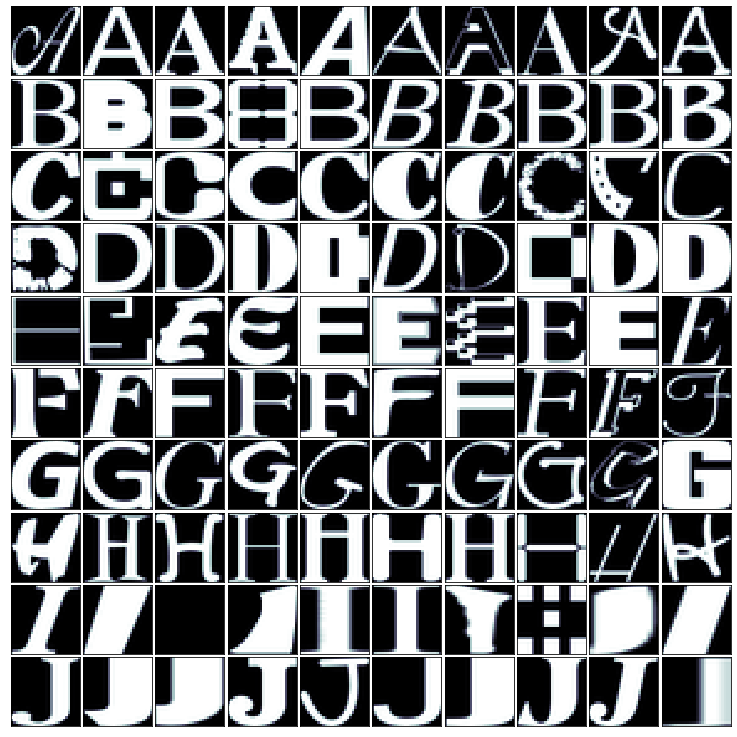

In [ ]:
# display the images from the data set
unique_labels = np.unique(y)
images = []
for l in unique_labels:    
    idx = np.where(y == l)[0]
    idx = idx[np.random.permutation(len(idx))[:10]]    
    for i in idx:
         images.append(x[i])

display_images(images, shape=(10, 10))

####  <span style="color:red"></span>Use the *deep feedforward neural network* as the classifier to perform images classification task in a *single split training and testing*.


<span style="color:red">**(a)**</span> **Write your code to reshape the variable `x` storing features from `[num_samples, width, height]` dimension to `[num_samples, num_features]` with `num_features = width x height`. ** (*Hint*: you might want to use the `reshape()' function)
<div style="text-align: right"> <span style="color:red">**[3 points]**</span> </div>

In [ ]:
# reshape the variable x
x = x.reshape(x.shape[0],-1)
x.shape

(18724, 784)

In training the DNN, scaling data is important. The pixel intensities of images are in the range of [0, 255], which makes the neural network difficult to learn.

**Rescale the input data into the range of [0, 1]**
<div style="text-align: right"> 
<span style="color:red">**[2 points]**</span> </div>

In [ ]:
# rescale the input data and using minmax scaler
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scale = min_max_scaler.fit_transform(x)
min_np_scale = np_scale.min()
max_np_scale = np_scale.max()
print(min_np_scale)
print(max_np_scale)
print(np_scale.shape)


0.0
1.0
(18724, 784)


<span style="color:red">**(b)**</span> **Split the data into two subsets: 70% for training and 30% for testing. Note that you must use [*Stratified-Shuffle-Split*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) to make sure training and testing are balanced and randomly shuffled before learning the model.**
<div style="text-align: right"> <span style="color:red">**[5 points]**</span> </div>

In [ ]:
# Balancing the train and test data by splitting
from sklearn.model_selection import StratifiedShuffleSplit
splitting_dataset = StratifiedShuffleSplit(n_splits=1, test_size=0.3,train_size=0.7, random_state=34)
splitting_dataset.get_n_splits(x,y)
for trainindex, testindex in splitting_dataset.split(x,y):
        print("TRAIN:", trainindex, "TEST:", testindex)
        train_x, test_x = x[trainindex], x[testindex]
        train_y, test_y = y[trainindex], y[testindex]
print(len(train_x))
print(len(test_y))


TRAIN: [13016  4750  4962 ... 16717  8281  2615] TEST: [10525  4501 14214 ...  1220  7503  1087]
13106
5618


<span style="color:red">**(c)**</span> **Construct a deep feedforward neural network with the following architecture:**

* An input layer followed by *two* hidden layers, each with *500* hidden units, and an *output* layer;
* *ReLU* activations for neurons in each hidden layer;
* Training with gradient descent optimizer with learning rate **0.0011**, batch size 128 and 50 epochs.

(*Hint*: *this question heavily relies on the knowledge you've learned from lab session in week 5 and 6. You are encouraged to revise these materials for this question*)

<div style="text-align: right"> <span style="color:red">**[20 points]**</span> </div>

In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# assign the input variable of hidden layer

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import tensorflow as tf

tf.reset_default_graph()

num_inputs = 28*28
num_hidden1 = 500
num_hidden2 = 500
num_outputs = len(np.unique(y))

inputs = tf.placeholder(tf.float32, shape=[None, num_inputs],name='x') 
labels = tf.placeholder(tf.int32,shape=[None],name='y')
x=inputs
y=labels

In [ ]:
# calculate the standard deviation

def neuron_layer(x, num_neurons, name, activation=None):
    with tf.name_scope("train"):
        num_inputs=int(x.get_shape()[1])
        
    stddev=2/np.sqrt(num_inputs)
    init=tf.truncated_normal([num_inputs,num_neurons],stddev=stddev)
    W=tf.Variable(init,name="weights")
    b=tf.Variable(tf.zeros([num_neurons]),name="biases")
    z=tf.matmul(x,W)+b
    if activation == "sigmoid":
       return tf.nn.sigmoid(z)
    elif activation == "relu":
       return tf.nn.relu(z)
    else:
        return z

In [ ]:
# Implementing the deep neural network
import warnings
import tensorflow as tf
warnings.filterwarnings("ignore", category=FutureWarning)

with tf.name_scope("dnn"):
    hidden1 = neuron_layer(x,num_hidden1, "hidden1", activation="relu") 
    hidden2 = neuron_layer(hidden1, num_hidden2, "hidden2", activation="relu")
    logits = neuron_layer(hidden2, num_outputs, "outputs")
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits) 
    loss = tf.reduce_mean(xentropy, name="loss")
    
with tf.name_scope("evaluation"):
   xentropy= tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,\
                                                             logits=logits, name='xentropy')
loss= tf.reduce_mean(xentropy, name="loss")
correct= tf.nn.in_top_k(logits,y,1)
accuracy= tf.reduce_mean(tf.cast(correct, tf.float32))
    
with tf.name_scope("train"):
   rate=0.0011
opt=tf.train.GradientDescentOptimizer(rate)
gradient= opt.compute_gradients(loss)
trainopt= opt.apply_gradients(gradient)
    
for var in tf.trainable_variables():
        tf.summary.histogram(var.op.name + "/values", var)
        
for grad, var in gradient:
        if grad is not None:
            tf.summary.histogram(var.op.name + "/gradients", grad)

# Accuracy summary
accuracy_summary = tf.summary.scalar('accuracy',accuracy)



In [ ]:
# using the tensorflow to merge the summary
tf.summary.histogram('hidden1/activations', hidden1)
tf.summary.histogram('hidden2/activations', hidden2)
merged = tf.summary.merge_all()

init = tf.global_variables_initializer()
saver = tf.train.Saver()

train_writer = tf.summary.FileWriter("models/dnn0/train", tf.get_default_graph())
test_writer = tf.summary.FileWriter("models/dnn0/test", tf.get_default_graph())

num_epochs = 50
batch_size = 128

<span style="color:red">**(d)**</span> **You are now required write code to train the DNN.** Write codes in the following cell. <span style="color:red">**[5 points]**</span> </div>

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

with tf.Session() as sess:
    init.run()
    print("Epoch\tTrain accuracy\tTest accuracy")
    for epoch in range(num_epochs):
        for idx_start in range(0, train_x.shape[0], batch_size):
            idx_end = train_x.shape[0]
            x_batch, y_batch = train_x[idx_start:idx_end],train_y[idx_start:idx_end]
            sess.run(trainopt, feed_dict={inputs: x_batch, labels: y_batch})
            
        summary_train, acc_train = sess.run([merged, accuracy],
                                             feed_dict={inputs: x_batch, labels: y_batch})
        summary_test, acc_test = sess.run([accuracy_summary, accuracy],
                                          feed_dict={inputs: test_x, labels: test_y})
        
        train_writer.add_summary(summary_train, epoch)
        test_writer.add_summary(summary_test, epoch)
        
        print("{}\t{}\t{}".format(epoch, acc_train, acc_test))

    save_path = saver.save(sess, "models/dnn0.ckpt")


Epoch	Train accuracy	Test accuracy
0	0.5799999833106995	0.5231398940086365
1	0.6399999856948853	0.5428978204727173
2	0.6800000071525574	0.5384478569030762
3	0.6800000071525574	0.5708436965942383
4	0.699999988079071	0.5496618151664734
5	0.7200000286102295	0.5566037893295288
6	0.699999988079071	0.5633677244186401
7	0.7200000286102295	0.570665717124939
8	0.7400000095367432	0.5781416893005371
9	0.7400000095367432	0.5829476714134216
10	0.7400000095367432	0.5859736800193787
11	0.7400000095367432	0.5909576416015625
12	0.7400000095367432	0.5941616296768188
13	0.7400000095367432	0.5961196422576904
14	0.7400000095367432	0.6003916263580322
15	0.7599999904632568	0.5998576283454895
16	0.7599999904632568	0.6069775819778442
17	0.7599999904632568	0.6454254388809204
18	0.8600000143051147	0.6865432262420654
19	0.8600000143051147	0.6904592514038086
20	0.8600000143051147	0.6927732229232788
21	0.8399999737739563	0.6502314209938049
22	0.8600000143051147	0.6867212653160095
23	0.8600000143051147	0.69651120901

---

## <span style="color:#0b486b">Word2Vec, Text Analytics and Application</span>


we are going to use Word2Vec for document classification on [20 Newsgroups](http://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-20/www/data/news20.html) dataset. This dataset is a collection of messages collected from 20 different netnews newsgroups. One thousand messages from each of the twenty newsgroups were chosen at random and partitioned by newsgroup name. The list of newsgroups from which the messages were chosen is as follows:

`
alt.atheism
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc
soc.religion.christian
comp.sys.ibm.pc.hardware
comp.graphics
comp.os.ms-windows.misc
comp.sys.mac.hardware
comp.windows.x
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.space
sci.med
misc.forsale
`

In [ ]:
# Download the dataset from sklearn
from sklearn.datasets import fetch_20newsgroups
newsgroups_all = fetch_20newsgroups(subset='all', remove=('headers'))

In [ ]:
import numpy as np
print(newsgroups_all.keys())
# Display the total number of documents and unique labels
print(len(newsgroups_all['filenames']))
print(np.unique(newsgroups_all['target_names']))
print(np.unique(newsgroups_all.target))


dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
18846
['alt.atheism' 'comp.graphics' 'comp.os.ms-windows.misc'
 'comp.sys.ibm.pc.hardware' 'comp.sys.mac.hardware' 'comp.windows.x'
 'misc.forsale' 'rec.autos' 'rec.motorcycles' 'rec.sport.baseball'
 'rec.sport.hockey' 'sci.crypt' 'sci.electronics' 'sci.med' 'sci.space'
 'soc.religion.christian' 'talk.politics.guns' 'talk.politics.mideast'
 'talk.politics.misc' 'talk.religion.misc']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


####  <span style="color:red"></span>. Convert the documents into a list of tokens using the function `gensim.utils.tokenize`.
<div style="text-align: right"><span style="color:red"></span></div>


In [ ]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import gensim
# coverting the documents into list of tokens
from gensim.utils import tokenize
token=[]
for i in range(len(newsgroups_all.data)):
    list_token=tokenize(newsgroups_all.data[i],deacc=True)
    token.append(list(list_token))
list(token)

[['I',
  'am',
  'sure',
  'some',
  'bashers',
  'of',
  'Pens',
  'fans',
  'are',
  'pretty',
  'confused',
  'about',
  'the',
  'lack',
  'of',
  'any',
  'kind',
  'of',
  'posts',
  'about',
  'the',
  'recent',
  'Pens',
  'massacre',
  'of',
  'the',
  'Devils',
  'Actually',
  'I',
  'am',
  'bit',
  'puzzled',
  'too',
  'and',
  'a',
  'bit',
  'relieved',
  'However',
  'I',
  'am',
  'going',
  'to',
  'put',
  'an',
  'end',
  'to',
  'non',
  'PIttsburghers',
  'relief',
  'with',
  'a',
  'bit',
  'of',
  'praise',
  'for',
  'the',
  'Pens',
  'Man',
  'they',
  'are',
  'killing',
  'those',
  'Devils',
  'worse',
  'than',
  'I',
  'thought',
  'Jagr',
  'just',
  'showed',
  'you',
  'why',
  'he',
  'is',
  'much',
  'better',
  'than',
  'his',
  'regular',
  'season',
  'stats',
  'He',
  'is',
  'also',
  'a',
  'lot',
  'fo',
  'fun',
  'to',
  'watch',
  'in',
  'the',
  'playoffs',
  'Bowman',
  'should',
  'let',
  'JAgr',
  'have',
  'a',
  'lot',
  'of',


### <span style="color:#0b486b"> Train the model </span>


####  <span style="color:red"></span>. Train gensim's word2vec model.
<div style="text-align: right"><span style="color:red"></span></div>

* Train gensim's word2vec model with the settings of:
    * The dimensionality of the feature vectors: `size=100`,
    * The maximum distance between the current and predicted word within a sentence: `window=5`,
    * Minimum frequence (ignore all words with total frequency lower than this): `min_count=5`,


In [ ]:
# Training the gensim word2vec model
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
gensim_model=Word2Vec(token, size=100, window=5, min_count=5, workers=8)


* Save the trained model to a file named "20_newsgroups.gensim"

In [ ]:
# save the gensim model in "20_newsgroups.genism"
gensim_model.save("20_newsgroups.gensim")
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# display size of the vocabulary in the list
show_voc=list(gensim_model.wv.vocab)
print(f"Size of vocabulary :{len(show_voc)}")

Size of vocabulary :42459


####  <span style="color:red"></span>. Using the embedding results, calculate and print out the ten most similar words to word 'law' and their corresponding similarity scores.<div style="text-align: right"><span style="color:red"></span></div> 

In [ ]:
# Printing similar words to law
gensim_model.wv.most_similar(positive='law')

[('court', 0.7302452921867371),
 ('enforcement', 0.714240312576294),
 ('laws', 0.7056587338447571),
 ('government', 0.7041505575180054),
 ('constitution', 0.675445556640625),
 ('federal', 0.6701177358627319),
 ('authority', 0.6686336398124695),
 ('rights', 0.6680377721786499),
 ('legal', 0.6605347990989685),
 ('Constitution', 0.658504843711853)]

### <span style="color:#0b486b"> Evaluate the embeddings using classification </span>

Now we investigate the quality of embedded vectors via document classification task. We have learned the embeddings for words, but not for documents yet, thus we need to find a way to extract the document embeddings from word embeddings. We are going to try two approaches:
* Taking the **sum** of vectors of all words in the document; or
* Taking the **average** of vectors of all words in the document.

####  <span style="color:red"></span>. Extract document vectors using `sum`.
<div style="text-align: right"><span style="color:red"></span></div> 

* Remove all ***empty*** documents. A document is empty if it does not contain any word in the vocabulary;
* Extract document vectors and save to variable `x`;
* Save the corresponding labels to variable `y`.

In [ ]:
# removing the empty documents
from itertools import compress
def extract_doc2vec(doc, w2v):
    vecs = [w2v[word] for word in doc if word in w2v]
    if len(vecs) > 0:
        vecs = np.asarray(vecs).sum(axis=0)
    return vecs

vecs = [extract_doc2vec(doc, gensim_model) for doc in token]
file = [len(v)>0 for v in vecs]
x = np.asarray(list(compress(vecs, file)))
y = np.asarray(list(compress(newsgroups_all.target, file)))

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  after removing the cwd from sys.path.
C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


####  <span style="color:red">**Question 2.8**</span>. Print out the number of documents retained after removing empty documents.
<div style="text-align: right"><span style="color:red">**[1 point]**</span></div> 

In [ ]:
# Display the sum of documents retained
print(len(x))
print(f"The Total number of documents retained is:{len(x)}")


18809
The Total number of documents retained is:18809


#### <span style="color:red"></span>. Split the data into two subsets: 70% for training and 30% for testing. Note that you must use [*Stratified-Shuffle-Split*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) to make sure training and testing are balanced and randomly shuffled before learning the model.
<div style="text-align: right"> <span style="color:red"></span> </div>

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
# train the data set with 70% for training and 30% for testing
train_split, test_split = next(StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=3967).split(x, y))
x_new_train, y_new_train = x[train_split], y[train_split]
x_new_test, y_new_test = x[test_split], y[test_split]

#### <span style="color:red"></span> **Use [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) as the classifier, train and test the model using the training and test datasets from the previous step. Report the training accuracy and testing accuracy.**
<div style="text-align: right"> <span style="color:red"></span> </div>

In [ ]:
#using logitic regression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
log_new = LogisticRegression()
log_new.fit(x_new_train, y_new_train)
acc_train = log_new.predict(x_new_train)
acc_test = log_new.predict(x_new_test)
print(f"The obtained train accuracy rate is: {accuracy_score(y_new_train, acc_train)}")
print(f"The obtained test accuracy rate is: {accuracy_score(y_new_test, acc_test)}")

The obtained train accuracy rate is: 0.5640285584080207
The obtained test accuracy rate is: 0.5202906255537835


C:\Users\abc\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


####  <span style="color:red"></span>Now modify the `extract_doc2vec` function above to  extract document vectors using `average`, instead of `sum`, and repeat the experiment: split the data, train and test using Logistic Regression.
<div style="text-align: right"><span style="color:red"></span></div> 

In [ ]:
def extract_doc2vec(doc, w2v):
    vecs = [w2v[word] for word in doc if word in w2v]
    if len(vecs) > 0:
        vecs = np.asarray(vecs).mean(axis=0)
    return vecs

In [ ]:
# using extract_doc2vec function to extract the document
vecs = [extract_doc2vec(doc, gensim_model) for doc in token]
x = np.asarray(list(compress(vecs, file)))
# splitting the data using logistic regression
x_new_train, x_new_test = x[train_split], x[test_split]
log_new = LogisticRegression()
log_new.fit(x_new_train, y_new_train)
acc_train1 = log_new.predict(x_new_train) 
acc_test1 = log_new.predict(x_new_test)
print(f"The obtained train accuracy rate is: {accuracy_score(y_new_train, acc_train1)}")
print(f"The obtained test accuracy rate is: {accuracy_score(y_new_test, acc_test1)}")

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


The obtained train accuracy rate is: 0.5970682059851131
The obtained test accuracy rate is: 0.5732766259082048


After extracting the document with sum and average with the help of extract_doc2vec function.At first the document is extracted using sum, then the experiment is repeated with the average doc vector. The accuracy value obtained in average doc vector is more when compare to the sum vector. The performance of average doc vector is better then the sum vector.I conclude that average doc vector performs robustly after training, splitting the data with logistic regression.

--- 
<div style="text-align: center"> <span style="color:black">Thank You</span> </div>